# Assign 11

<b>Question 1:</b>

Please look into following example. 
https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9

In jupyter notebook write a reflection on your understanding about <b>Neural networks</b> like <b>how they work,
training of neural works, hyperparameters of neural networks, back propagation etc.</b> 

You need to replicate the given example with your comments and understanding too.

Additional resource:

https://www.codementor.io/@james_aka_yale/a-gentle-introduction-to-neural-networks-for-machine-learning-hkijvz7lp

https://www.innoarchitech.com/blog/artificial-intelligence-deep-learning-neural-networks-explained


<hr>
It's incredible to think about the potential of neural networks. After reading some articles, I believe this is the future. A neural network works with big data. It's like a brain because it has its tiny neurons. Each neuron takes inputs and weights and then returns an output using perceptrons that have bias and activation function. 

The formula of finding the output of a single neuron is y=f(x1​∗w1​+x2​∗w2​+b). y is output and x1 and x2 are the inputs and w1 and w2 are the weights, b is a bias. 

Now, these small neurons connect to each other and create whole new neural networks. When multiple neurons are connected and passing information to one another, they can reduce the mean squared error. That's the main idea here. To reduce the mean squared error, we can use multiple different hidden layers. Therefore, However, more hidden layers mean more powerful computer power. 

Speaking of computer power, we have to fit the right inputs and weights otherwise there will be an issue called: overfitting. That's why we have to choose our hyperparameters of neural networks carefully. 

How does this thing work? After reading the articles and watching some videos on YouTube, neural networks use backpropagation and front propagation. Basically, both parties pass information to one another to predict what we want. For example, front propagation goes first and calculates the activation function in percentage. However, it needs to work with other neurons, so it considers the result of other neurons to predict. 

<hr>

After reading about neural networks, I found the image detection engine helpful because there are simple to understand the topic. For example, there are two pictures dog picture and a cat picture. However, since the computer only understands 1 and 0s, each neuron should calculate a small chunk of the image and then runs through hidden layers. Our goal is to reduce the mean squared errors; therefore, in the end, it should successfully detect cat pictures from a dog. Hidden layers will pass information to each other using backpropagation. Eventually, after running hundreds or thousands of times, we will be able to predict.  

<b> Question 2: </b>

Look into IRIS example in your lecture code, and go through introduction to deep learning lecture slides. 

<b>Replicate IRIS example </b> and <b> explain every step</b> to best of your understanding in terms of tensorflsow i.e. <b> 
    
Variables, Wrights, Bias, Activation function, Learning rate etc </b>. Submit a Jupyter notebook with all details.

In [6]:
"""
Download a dataset that is related to fuel consumption & Carbon dioxide emission of cars
"""

'\nDownload a dataset that is related to fuel consumption & Carbon dioxide emission of cars\n'

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
# take a look at the dataset
tf.compat.v1.disable_eager_execution()
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


So the followings are the <b>columns</b>

MODELYEAR e.g. 2014

MAKE e.g. Acura

MODEL e.g. ILX

VEHICLE CLASS e.g. SUV

ENGINE SIZE e.g. 4.7

CYLINDERS e.g 6

TRANSMISSION e.g. A6

FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9

FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9

FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2

CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0


In [28]:
'''
Here we are predicting Co2Emission of cars based on their engine size. 
So, defining X and Y value for the linear regression, 
that is, train_x and train_y:
'''
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [29]:
"""
Feeding with some random variables and then define the linear regression formula
b is bais
a is a weight
"""
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b
print(b, a)

<tf.Variable 'Variable_1:0' shape=() dtype=float32> <tf.Variable 'Variable:0' shape=() dtype=float32>


In [30]:
'''
Here we are calculating the mean squared error that I mentioned in the first question.
To find the mean squared error, we use tf.reduce_mean(). This function finds the mean of a multidimensional tensor, and 
the result can have a different dimension.
'''
loss = tf.compat.v1.reduce_mean(tf.square(y - train_y))
print(loss)

Tensor("Mean:0", shape=(), dtype=float32)


In [31]:
# Here here is the tensorflow optimization method. We picked 0.05 but it can any value. 
# The optimizers are used for improving speed and performance for training a specific model.
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.05)
print(optimizer)

In [32]:
# I think this makes the tensorflow optimization method more efficient
train = optimizer.minimize(loss)

In [35]:
#initializing the variables before executing a graph:
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

In [36]:
#Now we are ready to start the optimization and run the graph:
# Get every x and y variables and then apply session run to see them in the graph
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 26992.592 20.0 30.2
5 1891.721 59.76378 46.635117
10 1762.7241 57.911816 51.973316
15 1653.5896 56.615788 57.051537
20 1559.0438 55.404785 61.776962
25 1477.1368 54.277676 66.17523
30 1406.1787 53.2286 70.269
35 1344.7058 52.252155 74.07933
40 1291.4507 51.343315 77.625854
45 1245.3142 50.4974 80.92684
50 1205.3451 49.71005 83.99929
55 1170.7189 48.977207 86.85902
60 1140.7213 48.29511 89.520744
65 1114.734 47.660236 91.998184
70 1092.2202 47.069317 94.3041
75 1072.7162 46.51931 96.45037
80 1055.8192 46.00738 98.44805
85 1041.181 45.530895 100.30742
90 1028.4998 45.0874 102.038055
95 1017.5135 44.67461 103.64887


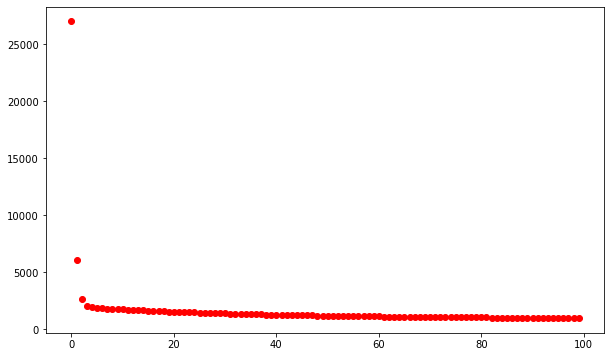

In [37]:
#Lets plot the loss values to see how it has changed during the training:
# Every graph shows me one single tensorflow computation. We want to 
plt.plot(loss_values, 'ro')

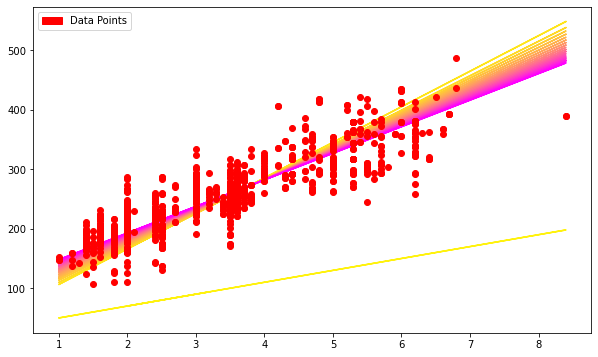

In [38]:
#Lets visualize how the coefficient and intercept of line has changed to fit the data:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')
green_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line])
plt.show()

In [39]:
'''
While Linear Regression is suited for estimating continuous values (e.g. estimating house price), 
it is not the best tool for predicting the class in which an observed data point
belongs. In order to provide estimate for classification, we need some sort of guidance on what
would be the most probable class for that data point. For this, we use Logistic 
Regression.
'''
# import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [41]:
'''
Iris Dataset:
This dataset was introduced by British Statistician and Biologist Ronald Fisher, 
it consists of 50 samples from each of three species of Iris (Iris setosa, 
Iris virginica and Iris versicolor). In total it has 150 records under 
five attributes - petal length, petal width, sepal length, sepal width and species. 
Dataset source

"Attributes Independent Variable"
petal length
petal width
sepal length
sepal width

"Dependent Variable"
Species
Iris setosa
Iris virginica
Iris versicolor
'''
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)
'''
"Placeholders"
Now we define x and y. These placeholders will hold our iris data (both the features and label matrices), 
and help pass them along to different parts of the algorithm. 
You can consider placeholders as empty shells into which we insert our data. We also need to give them shapes 
which correspond to the shape of our data. Later, we will 
insert data into these placeholders by “feeding” the placeholders the data via a “feed_dict” (Feed Dictionary).
1-This feature of TensorFlow allows us to create an algorithm which accepts data and knows something about the 
shape of the data without knowing the amount of data going in.
2-When we insert “batches” of data in training, we can easily adjust how many examples we train on in a single 
step without changing the entire algorithm.
We are feeding the x and y to show them in tensorflow here
'''
# numFeatures is the number of features in our input data.
# In the iris dataset, this number is '4'.
numFeatures = trainX.shape[1]

# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
numLabels = trainY.shape[1]

# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.compat.v1.placeholder(tf.float32, [None, numFeatures]) # Iris has 4 features, so X is a tensor to hold our data.
yGold = tf.compat.v1.placeholder(tf.float32, [None, numLabels]) # This will be our correct answers matrix for 3 classes.

In [43]:
'''
"Variables"
Much like Linear Regression, we need a shared variable weight matrix for Logistic Regression. 
We initialize both W and b as tensors full of zeros. Since we are going to learn 
W and b, their initial value does not matter too much. These variables are the objects which 
define the structure of our regression model, and we can save them after they have 
been trained so we can reuse them later.
We define two TensorFlow variables as our parameters. These variables will hold the weights 
and biases of our logistic regression and they will be continually updated during 
training.
Notice that W has a shape of [4, 3] because we want to multiply the 4-dimensional input vectors 
by it to produce 3-dimensional vectors of evidence for the difference classes. 
b has a shape of [3] so we can add it to the output. Moreover, unlike our placeholders above 
which are essentially empty shells waiting to be fed data, TensorFlow variables need 
to be initialized with values, e.g. with zeros.
'''
W = tf.compat.v1.Variable(tf.zeros([4, 3]))  # 4-dimensional input and  3 classes
b = tf.compat.v1.Variable(tf.zeros([3])) # 3-dimensional output [0,0,1],[0,1,0],[1,0,0]

#Randomly sample from a normal distribution with standard deviation .01

weights = tf.compat.v1.Variable(tf.compat.v1.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name="weights"))

bias = tf.compat.v1.Variable(tf.compat.v1.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.01,
                                    name="bias"))

In [44]:
'''
Logistic Regression model
We now define our operations in order to properly run the Logistic Regression. 
Logistic regression is typically thought of as a single equation:

𝑦̂ =𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝑊𝑋+𝑏)
 
However, for the sake of clarity, we can have it broken into its three main components:

1-a weight times features matrix multiplication operation,
2-a summation of the weighted features and a bias term,
3-and finally the application of a sigmoid function.
As such, you will find these components defined as three separate operations below.
'''
# Three-component breakdown of the Logistic Regression equation.
# Note that these feed into each other.
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

In [45]:
'''
"Training"
The learning algorithm is how we search for the best weight vector ( 𝐰 ). 
This search is an optimization problem looking for the hypothesis that optimizes an error/cost measure.

What tell us our model is bad?
The Cost or Loss of the model, so what we want is to minimize that.

What is the cost function in our model?
The cost function we are going to utilize is the Squared Mean Error loss function.

How to minimize the cost function?
We can't use least-squares linear regression here, so we will use gradient descent instead. 
Specifically, we will use batch gradient descent which calculates the gradient from all data points in the data set.


'''
# Number of Epochs in our training
numEpochs = 700

# Defining our learning rate iterations (decay)
learningRate = tf.compat.v1.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
#Defining our cost function - Squared Mean Error
cost_OP = tf.compat.v1.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")
#Defining our Gradient Descent
training_OP = tf.compat.v1.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

# Create a tensorflow session
sess = tf.compat.v1.Session()

# Initialize our weights and biases variables.
init_OP = tf.compat.v1.global_variables_initializer()

# Initialize all tensorflow variables
sess.run(init_OP)

In [46]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

In [47]:
#Now we can define and run the actual training loop, like this:
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGold: trainY})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

step 0, training accuracy 0.333333, cost 34.0217, change in cost 34.0217
step 10, training accuracy 0.616162, cost 29.9111, change in cost 4.11062
step 20, training accuracy 0.646465, cost 27.9937, change in cost 1.91744
step 30, training accuracy 0.646465, cost 26.3795, change in cost 1.61415
step 40, training accuracy 0.646465, cost 25.04, change in cost 1.33952
step 50, training accuracy 0.646465, cost 23.9336, change in cost 1.10639
step 60, training accuracy 0.646465, cost 23.0174, change in cost 0.916166
step 70, training accuracy 0.646465, cost 22.2536, change in cost 0.763828
step 80, training accuracy 0.646465, cost 21.611, change in cost 0.642591
step 90, training accuracy 0.646465, cost 21.065, change in cost 0.54599
step 100, training accuracy 0.656566, cost 20.5964, change in cost 0.468632
step 110, training accuracy 0.666667, cost 20.1902, change in cost 0.406225
step 120, training accuracy 0.666667, cost 19.8347, change in cost 0.355463
step 130, training accuracy 0.6666

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


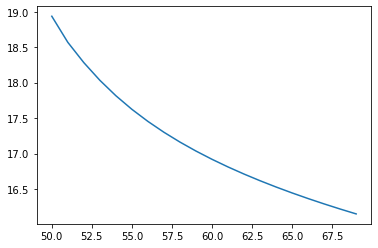

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()

# Assign 11 Done